<a href="https://colab.research.google.com/github/IndraMadika/ML_Study/blob/main/Model/Linear_Regression_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load dataset
dataset = tfds.load('mnist', split='train[:80%]', shuffle_files=True)

# Preprocess the data
def preprocess(features):
    x = features['image']
    y = features['label']
    x = tf.cast(x, tf.float32) / 255.0
    y = tf.cast(y, tf.float32)
    return x, y

# Create TensorFlow Dataset
dataset = dataset.map(preprocess).batch(32)

In [8]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [12]:
#Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [13]:
# Train the model
model.fit(dataset, epochs=10)

Epoch 1/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5057 - accuracy: 0.8683
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3133 - accuracy: 0.9124
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2888 - accuracy: 0.9194
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2766 - accuracy: 0.9225
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2688 - accuracy: 0.9244
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2632 - accuracy: 0.9261
Epoch 7/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2589 - accuracy: 0.9277
Epoch 8/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2554 - accuracy: 0.9286
Epoch 9/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2524 - accuracy: 0.9295
Epoch 10/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.24

In [14]:
# Evaluate the model
test_dataset = tfds.load('mnist', split='train[80%:]', shuffle_files=True)
test_dataset = test_dataset.map(preprocess).batch(32)
predictions = model.predict(test_dataset)

375/375 [==============================] - 2s 4ms/step


In [15]:
# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

In [16]:
# Get true labels from the test dataset
true_labels = []
for x, y in test_dataset:
    true_labels.extend(y.numpy())

In [17]:
# Calculate metrics
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='macro')
recall = recall_score(true_labels, predicted_labels, average='macro')
f1 = f1_score(true_labels, predicted_labels, average='macro')
confusion_mat = confusion_matrix(true_labels, predicted_labels)

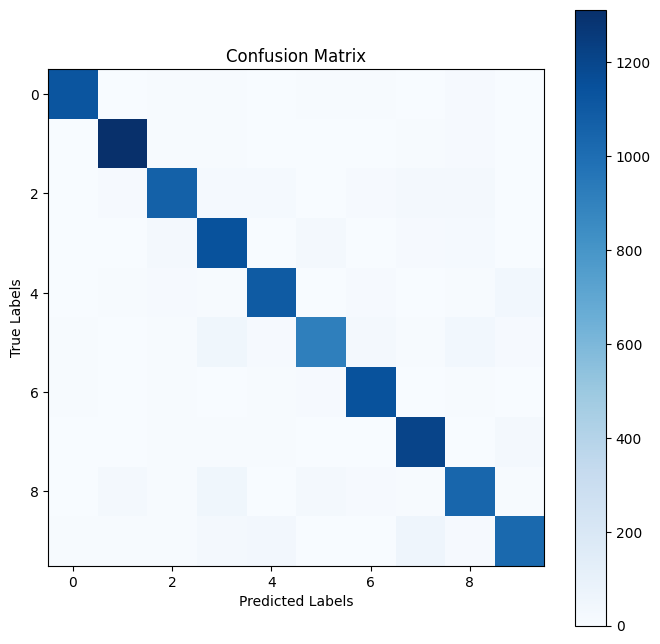

In [18]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 8))
plt.imshow(confusion_mat, cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [19]:
# Print the metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1)
print('Confusion Matrix:')
print(confusion_mat)

Accuracy: 0.9211666666666667
Precision: 0.921233449522985
Recall: 0.9194847050217927
F1-Score: 0.919971530763565
Confusion Matrix:
[[1124    0    6    7    0    9    8    1   12    2]
 [   1 1312    6    7    2    3    0    8   11    3]
 [   2   13 1063   20   17    4   13   24   22    2]
 [   5    1   23 1140    1   25    2   11   17    5]
 [   3   10   11    6 1096    0   12    2    6   36]
 [   9    2    8   49   15  909   21    8   37   13]
 [  10    4    7    3   10   14 1140    0    8    1]
 [   3    4    8    6    8    1    1 1209    1   21]
 [   5   24   10   48    5   22   11    6 1038    7]
 [   7   10    6   22   33    4    1   60   14 1023]]
